In [1]:
from BFCalc.BFInterp import DM_spectrum_setup
from BFCalc.createspectragrids import singlechannel_diffflux, getspectrafunc
from utils import log10eaxis, logjacob, makedist, makelogjacob, bkgdist, edisp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy import special
from matplotlib import cm
from tqdm.autonotebook import tqdm as notebook_tqdm
import os, sys
sys.path.append("BFCalc")


/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
logjacob = makelogjacob(log10eaxis)

In [3]:
logmassaxis = np.linspace(-1,2,16)
colormap = cm.get_cmap('cool')

gridtointerpolate   = np.load(f"BFCalc/griddata/channel=b_massenergy_diffflux_grid.npy")
massvalues          = np.array(np.load(f"BFCalc/griddata/massvals_massenergy_diffflux_grid.npy"))
log10xvals        = np.load(f"BFCalc/griddata/log10xvals_massenergy_diffflux_grid.npy")

log10massvals = np.log10(massvalues)-3
gridtointerpolate

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_55087/3464075514.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('cool')


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.79549021e-05, 2.09533162e-05, 1.04230676e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.83211295e-05, 2.84453450e-05, 1.41145707e-05],
       ...,
       [4.10517119e+00, 3.97644319e+00, 3.84543215e+00, ...,
        1.31400894e-07, 8.88485578e-08, 6.16119105e-08],
       [3.49801982e+00, 3.41892126e+00, 3.38142276e+00, ...,
        8.67136554e-08, 5.87862341e-08, 4.01201242e-08],
       [3.39107839e+00, 3.42814497e+00, 3.56227681e+00, ...,
        4.77854570e-08, 3.23265813e-08, 2.14454615e-08]])

In [4]:
makedist(-1, normeaxis=10**log10eaxis)(log10eaxis)

array([4.09365321, 3.98605317, 3.87805314, 3.76965315, 3.66085319,
       3.55165324, 3.44205328, 3.33205331, 3.2216533 , 3.11085329,
       2.99965328, 2.88805324, 2.77605322, 2.66365319, 2.55085312,
       2.43765313, 2.3240532 , 2.21005323, 2.09565315, 1.98085317,
       1.86565319, 1.75005319, 1.63405326, 1.51765326, 1.40085319,
       1.28365316, 1.16605319, 1.04805325, 0.92965328, 0.81085327,
       0.69165317, 0.57205312,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_55087/3836008613.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


-0.10264452309872141
-0.05233695223224055
-0.028047166880249996
-0.015684505794649972
-0.009122169813827963
-0.005507982151362167
-0.0034487788321202473
-0.0022374182094870854
-0.0015028069115210485
-0.0010441868759136774
-0.000749781653073267
-0.0005555675391533121
-0.0004237265369333443
-0.0003309764323335962
-0.00026188147287342645
-0.00020453928123309595


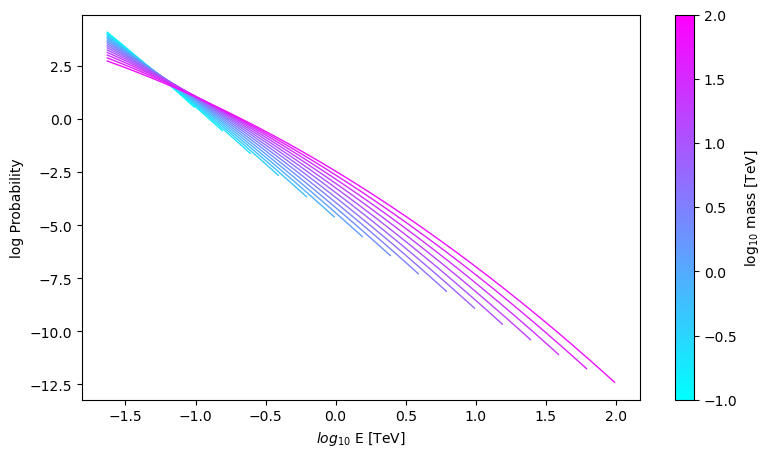

In [5]:
plt.figure(figsize=(9,5))
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    dN_dE_norm = special.logsumexp(makedist(logmass, normeaxis=10**log10eaxis)(log10eaxis)+logjacob)
    print(dN_dE_norm)
    plt.plot(log10eaxis, makedist(logmass, normeaxis=10**log10eaxis)(log10eaxis), color=color, lw=1.0)
    # plt.axvline(logmass, color=color, lw=0.3)
plt.xlabel(r'$log_{10}$ E [TeV]')
plt.ylabel(r'log Probability')
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
# plt.ylim(-20,0)


plt.show()

In [6]:
special.logsumexp(DM_spectrum_setup(2.0, normeaxis=10**log10eaxis)(log10eaxis)+makelogjacob(log10eaxis))

/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:33: RuntimeWarning: divide by zero encountered in log
  logdN_dE_fullaxis = np.squeeze(np.log(spectralfunc(eaxis)))


-8.881784197001252e-16

In [7]:
special.logsumexp( np.array([makedist(2.0, normeaxis=10**log10eaxis)(logeval) for logeval in log10eaxis])+logjacob)


-0.00020453928123309595

In [8]:
spectravals = []
for logmass in notebook_tqdm(logmassaxis):
    tempfunc = DM_spectrum_setup(logmass, normeaxis=10**log10eaxis)
    
    singlerowspecvals = tempfunc(log10eaxis)
    print(special.logsumexp(singlerowspecvals+logjacob))
    spectravals.append(singlerowspecvals)
spectravals = np.array(spectravals)

100%|██████████| 16/16 [00:00<00:00, 2057.80it/s]

0.0
4.440892098500626e-16
0.0
-4.440892098500626e-16
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-8.881784197001252e-16


In [9]:
print(special.logsumexp(spectravals[0]+logjacob))

0.0


In [10]:
spectravals[3,:]

array([ 3.00214757,  2.97143152,  2.94004216,  2.90794545,  2.87478429,
        2.84125276,  2.80655773,  2.77098478,  2.73448252,  2.69659719,
        2.65749402,  2.61679934,  2.5751893 ,  2.53261889,  2.48815535,
        2.44367972,  2.39713358,  2.34947506,  2.30064948,  2.24931708,
        2.19802581,  2.14396084,  2.08852908,  2.03166844,  1.97137868,
        1.91016782,  1.84496451,  1.77795999,  1.70908626,  1.6351157 ,
        1.56282843,  1.48490572,  1.40495579,  1.32300622,  1.23373651,
        1.14771811,  1.05359826,  0.95706689,  0.85835636,  0.74882414,
        0.64324079,  0.52517919,  0.40350678,  0.27880337,  0.13630338,
        0.00599221, -0.14388096, -0.2970163 , -0.45077604, -0.63255058,
       -0.79451739, -0.98788515, -1.18579305, -1.38142358, -1.62486859,
       -1.81568754, -2.05171422, -2.28308717, -2.48783597, -2.74559257,
       -2.87394072, -3.02122194,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,      

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_55087/1670332321.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


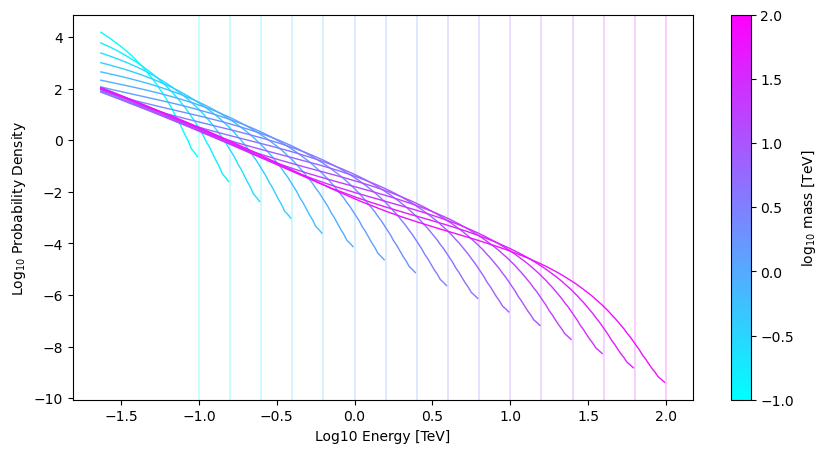

In [11]:
plt.figure(dpi=100,figsize=(10,5))
# plt.pcolormesh(log10eaxis, logmassaxis, spectravals, label=logmass, lw=0.8)
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    
    
    single_spectravals = np.array(spectravals)[idx,:]
    plt.plot(log10eaxis, single_spectravals, color=color, lw=1.0, label=special.logsumexp(single_spectravals+logjacob))
    plt.axvline(logmass, c=color, lw=0.3, linestyle='-')

# for logmassval in log10massvals:
#     plt.axvline(logmassval, c='tab:orange', lw=0.5, linestyle="--")
plt.xlabel('Log10 Energy [TeV]')

plt.ylabel(r'Log$_{10} $ Probability Density')
# plt.yscale('log')
# plt.xlim([-0.1*(logmassaxis[-1]-logmassaxis[0])+logmassaxis[0], 0.1*(logmassaxis[-1]-logmassaxis[0])+logmassaxis[-1]])
# plt.ylim([-8,0])

# plt.legend()
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
plt.show()

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_55087/3119422218.py:15: RuntimeWarning: divide by zero encountered in log
  np.log(gridtointerpolate).T, label='log')
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_55087/3119422218.py:21: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


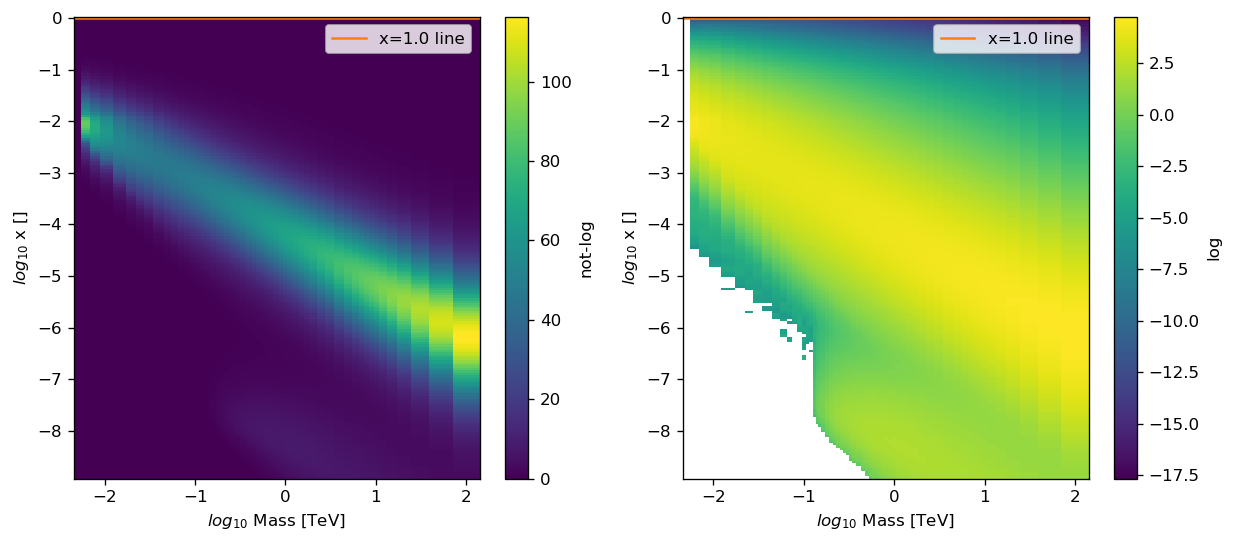

In [12]:
plt.figure(dpi=120,figsize=(12,5))
plt.subplot(1,2,1)
plt.pcolormesh(log10massvals, 
               log10xvals, 
               (gridtointerpolate).T)
plt.axhline(0.0, label="x=1.0 line", c="tab:orange")
plt.xlabel(r"$log_{10}$ Mass [TeV]")
plt.ylabel(r"$log_{10}$ x []")
plt.colorbar(label='not-log')
plt.legend()

plt.subplot(1,2,2)
plt.pcolormesh(log10massvals, 
               log10xvals, 
               np.log(gridtointerpolate).T, label='log')
plt.axhline(0.0, label="x=1.0 line", c="tab:orange")
plt.xlabel(r"$log_{10}$ Mass [TeV]")
plt.ylabel(r"$log_{10}$ x []")
plt.colorbar(label='log')

plt.legend()


In [13]:
log10massvals.shape

(62,)

In [14]:
gridtointerpolate[log10massvals<-1.,]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.79549021e-05, 2.09533162e-05, 1.04230676e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.83211295e-05, 2.84453450e-05, 1.41145707e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.17994787e-05, 1.30801598e-05, 9.14500095e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.97511400e-05, 1.19141530e-05, 8.37645482e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.85103340e-05, 1.15053739e-05, 8.27572263e-06]])

In [15]:
np.arange(0,5)

array([0, 1, 2, 3, 4])

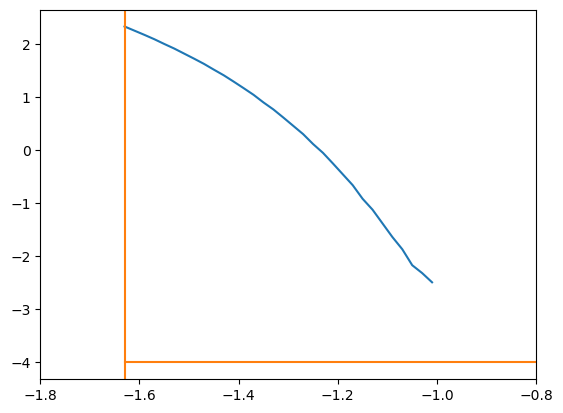

In [16]:
plt.figure()
plt.plot(log10eaxis, DM_spectrum_setup(-1.0)(log10eaxis))
plt.plot(log10eaxis, 0*log10eaxis-4, c="tab:orange")
plt.axvline(log10eaxis[0], c="tab:orange")
plt.xlim(-1.8,-0.8)
plt.show()

In [17]:
special.logsumexp(makedist(logmass=1.5, normeaxis=10**log10eaxis)(log10eaxis)+logjacob)

-0.000373556112034823

In [18]:
special.logsumexp(DM_spectrum_setup(1.5, normeaxis=10**log10eaxis)(log10eaxis)+logjacob)

0.0

In [19]:
log10xvals = np.load(f"BFCalc/griddata/log10xvals_massenergy_diffflux_grid.npy")


/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_55087/3482893495.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


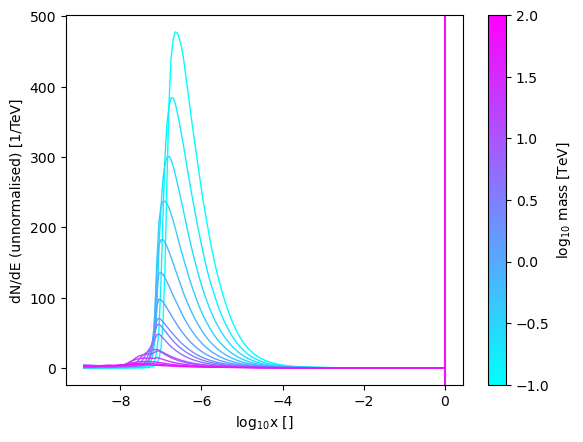

In [20]:
plt.figure()
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])

    plt.plot(log10xvals, getspectrafunc(10**logmass, 'tau')(10**(log10xvals+logmass)), color=color, lw=1.0)
plt.axvline(0.0, color=color)
plt.xlabel(r'log$_{10}$x []')
plt.ylabel('dN/dE (unnormalised) [1/TeV]')
# plt.xlim([-2,0])
# plt.ylim([0,10])
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
plt.show()

/Users/lpin0002/Desktop/DMPipe/BFCalc/createspectragrids.py:101: RuntimeWarning: invalid value encountered in log10
  return twodinterpolationfunc(np.log10(mDM), np.log10(energy/mDM))
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_55087/2062852981.py:4: RuntimeWarning: divide by zero encountered in log
  normvals = np.log(getspectrafunc(10**logmass, 'b')(log10eaxis))
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_55087/2062852981.py:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(log10xvals, np.log(getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass))/norm), color=color, lw=1.0)
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_55087/2062852981.py:7: RuntimeWarning: invalid value encountered in log
  plt.plot(log10xvals, np.log(getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass))/norm), color=color, lw=1.0)
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_55087/2062852981.py:14: MatplotlibDeprecationWarning: Unable t

-2.2792854862536442
-2.181967056818499
-2.1191253117283653
-2.0724416800466394
-2.0281328452474474
-1.976970609673993
-1.9095659241380103
-1.8309396628449832
-1.7464240564429383
-1.6712992105670177
-1.6180362935937393
-1.5678676702865866
-1.5097020364654854
-1.4432208021273707
-1.3605833974316004
-1.3138350424058014


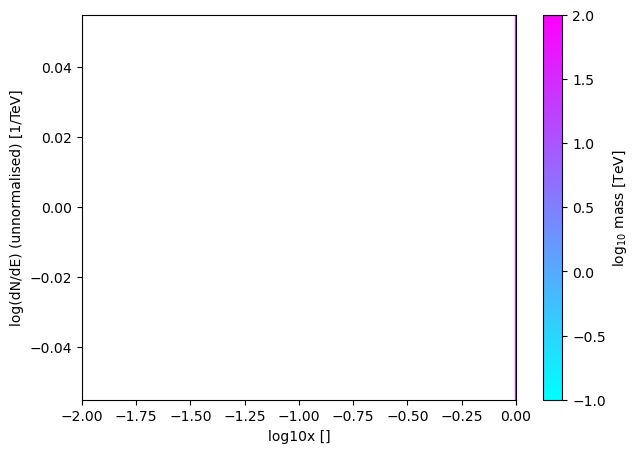

In [21]:
plt.figure(figsize=(7,5))
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    normvals = np.log(getspectrafunc(10**logmass, 'b')(log10eaxis))
    norm = special.logsumexp(normvals[~np.isnan(normvals)])
    print(norm)
    plt.plot(log10xvals, np.log(getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass))/norm), color=color, lw=1.0)
plt.axvline(0.0, color=color)
plt.xlabel('log10x []')
plt.ylabel('log(dN/dE) (unnormalised) [1/TeV]')
plt.xlim([-2,0])
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
plt.show()

0.2753437571099346
0.43489132898975325
0.5526123579470246
0.6085108445721632
0.6083296875450878
0.5712842926084312
0.5213770589243246
0.47396701202957003
0.4472347076790625
0.44810367821569125
0.4758138399879134
0.5319109235266638
0.6104625205664149
0.7003530767138565
0.7973564597479419
0.8543044322087552


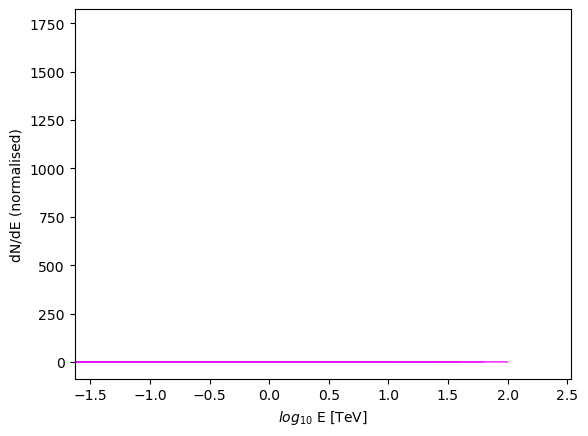

In [22]:
plt.figure()
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    dN_dE_norm = np.nansum(getspectrafunc(10**logmass, 'b')(10**log10eaxis))
    print(dN_dE_norm)
    plt.plot(log10xvals+logmass, getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass))/dN_dE_norm, color=color, lw=1.0)
plt.xlim([min(log10eaxis), max(log10eaxis)])
plt.xlabel(r'$log_{10}$ E [TeV]')
plt.ylabel(r'dN/dE (normalised)')

plt.show()

6.323675973574467
6.318099456022129
6.29999910031488
6.276483988118552
6.249601676822265
6.21982693532456
6.1870989610988385
6.151143239003433
6.111571484287385
6.067909285935638
6.019598873591435
5.965992708415937
5.906343503695666
5.839793135676912
5.765362137792424
5.681941618774866


/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_55087/3090158571.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


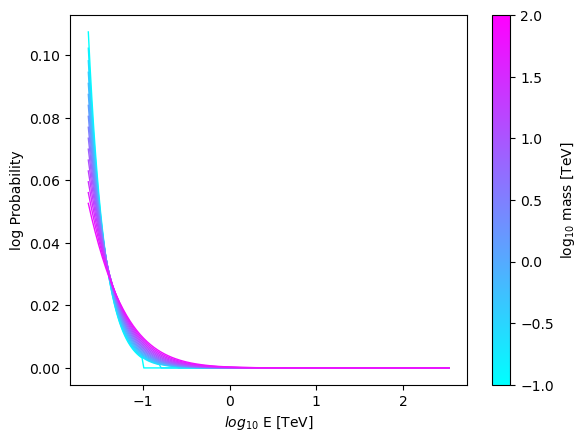

In [23]:
plt.figure()
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    dN_dE_norm = special.logsumexp(makedist(logmass, normeaxis=10**log10eaxis)(log10eaxis))
    print(dN_dE_norm)
    plt.plot(log10eaxis, np.exp(makedist(logmass, normeaxis=10**log10eaxis)(log10eaxis)-dN_dE_norm), color=color, lw=1.0)
plt.xlabel(r'$log_{10}$ E [TeV]')
plt.ylabel(r'log Probability')
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
plt.show()

/Users/lpin0002/Desktop/DMPipe/utils.py:80: RuntimeWarning: divide by zero encountered in log
  val  = np.log(bkgfull.evaluate(energy=np.power(10.,logenerg)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:82: RuntimeWarning: divide by zero encountered in log
  norm = special.logsumexp(np.log(bkgfull.evaluate(energy=np.power(10.,log10eaxis)*u.TeV,


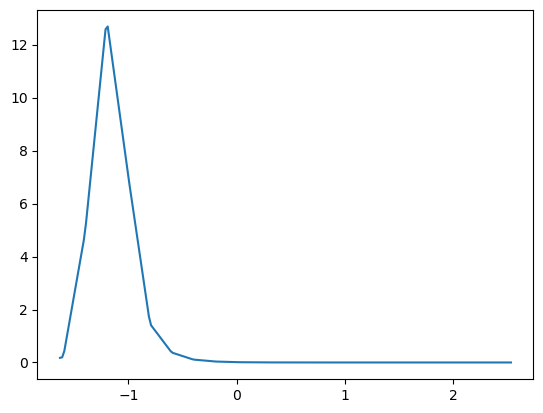

In [24]:
plt.figure()
plt.plot(log10eaxis, np.exp(bkgdist(log10eaxis)))

In [25]:
testlog10evals = np.linspace(log10eaxis[0], log10eaxis[-1],16)

/Users/lpin0002/Desktop/DMPipe/utils.py:40: RuntimeWarning: divide by zero encountered in log
  probabilityval = np.log(edispkernel.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:42: RuntimeWarning: divide by zero encountered in log
  normalisationfactor = special.logsumexp(np.log(edispkernel.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_55087/1143427708.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


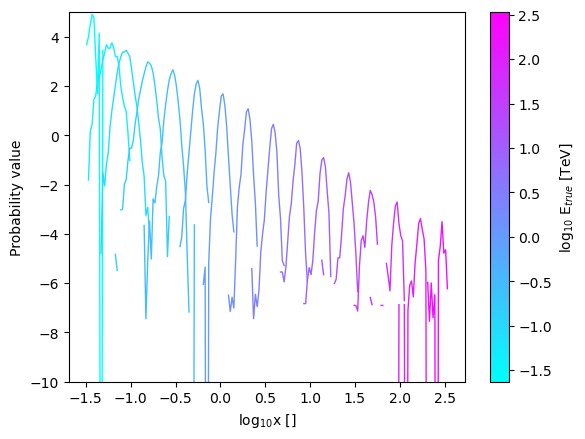

In [26]:
plt.figure()
for idx, log10eval in enumerate(testlog10evals):
    color = colormap(idx/testlog10evals.shape[0])

    plt.plot(log10eaxis, edisp(log10eaxis, log10eval)-special.logsumexp(edisp(log10eaxis, log10eval)+logjacob), color=color, lw=1.0)
    
plt.xlabel(r'log$_{10}$x []')
plt.ylabel('Probability value')
norm = mpl.colors.Normalize(vmin=testlog10evals[0], vmax=testlog10evals[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ E$_{true}$ [TeV]')
plt.ylim([-10,5])
plt.show()

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_55087/844480029.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


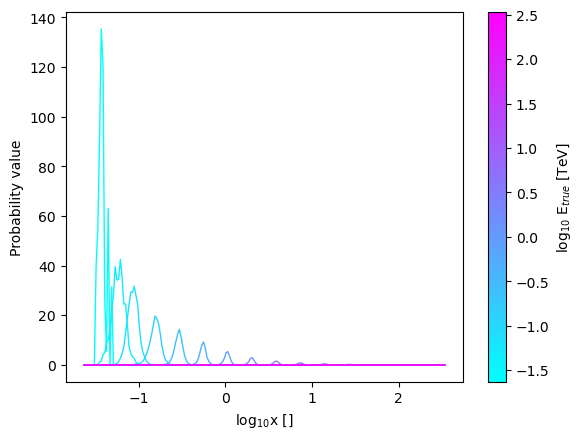

In [27]:
plt.figure()
for idx, log10eval in enumerate(testlog10evals):
    color = colormap(idx/testlog10evals.shape[0])
    plt.plot(log10eaxis, np.exp(edisp(log10eaxis, log10eval)-special.logsumexp(edisp(log10eaxis, log10eval)+logjacob)), color=color, lw=1.0)
    
plt.xlabel(r'log$_{10}$x []')
plt.ylabel('Probability value')
norm = mpl.colors.Normalize(vmin=testlog10evals[0], vmax=testlog10evals[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ E$_{true}$ [TeV]')
plt.show()

In [28]:
special.logsumexp(edisp(log10eaxis, log10eval)+logjacob)

1.1102230246251565e-16

/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:33: RuntimeWarning: divide by zero encountered in log
  logdN_dE_fullaxis = np.squeeze(np.log(spectralfunc(eaxis)))
/Users/lpin0002/Desktop/DMPipe/utils.py:80: RuntimeWarning: divide by zero encountered in log
  val  = np.log(bkgfull.evaluate(energy=np.power(10.,logenerg)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:82: RuntimeWarning: divide by zero encountered in log
  norm = special.logsumexp(np.log(bkgfull.evaluate(energy=np.power(10.,log10eaxis)*u.TeV,


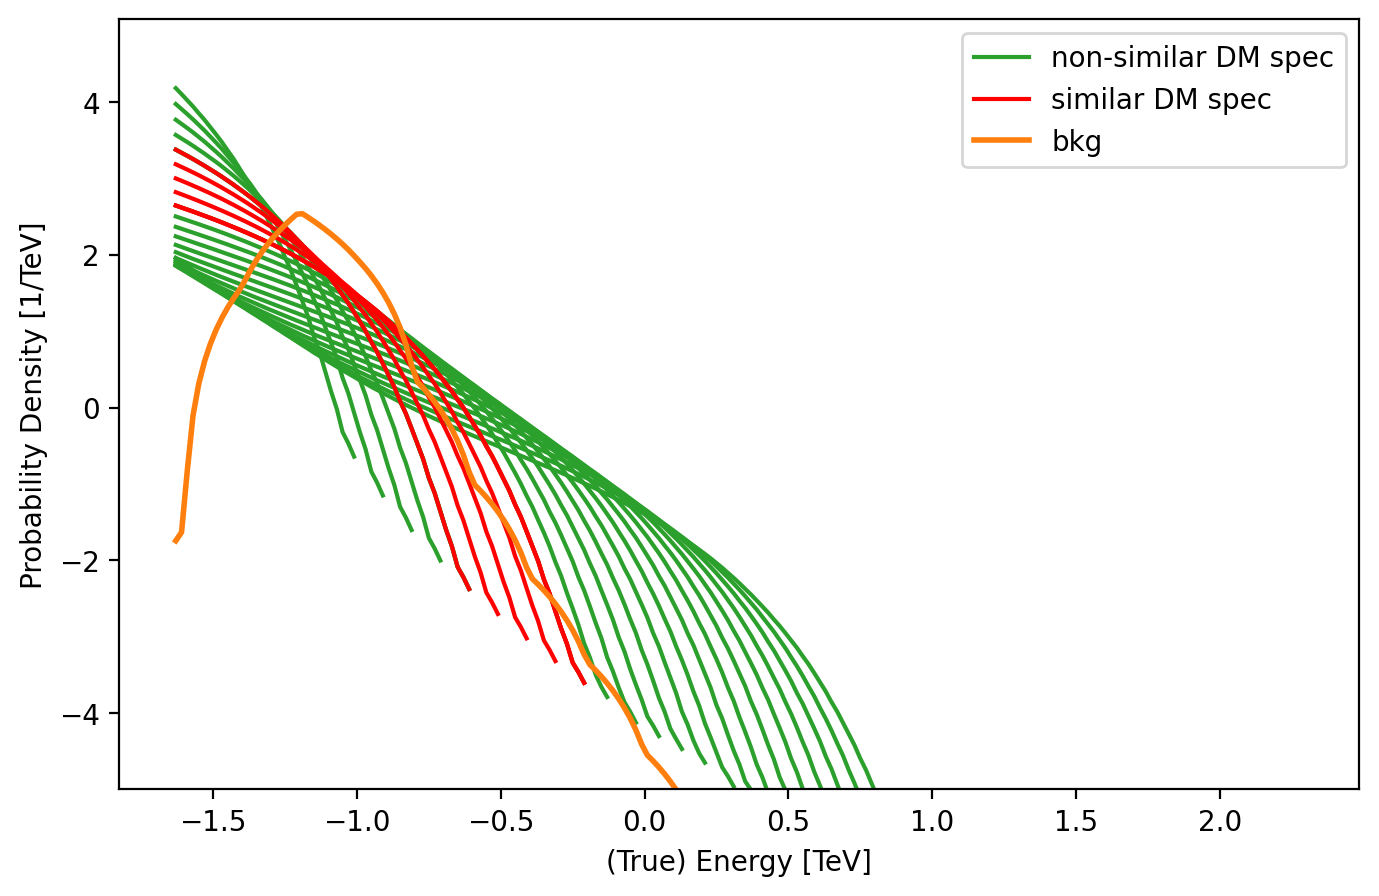

In [37]:
plt.figure(figsize=(8,5), dpi=200)



for logmass in np.linspace(-1.0,-0.6,5):
    plt.plot(log10eaxis, DM_spectrum_setup(logmass,normeaxis=10**log10eaxis)(log10eaxis), c='tab:green')
plt.plot(log10eaxis, DM_spectrum_setup(logmass,normeaxis=10**log10eaxis)(log10eaxis), c='tab:green', label='non-similar DM spec')
    
for logmass in np.linspace(-0.2,1.0,15):
    plt.plot(log10eaxis, DM_spectrum_setup(logmass,normeaxis=10**log10eaxis)(log10eaxis), c='tab:green')

for logmass in np.linspace(-0.6,-0.2,5):
    plt.plot(log10eaxis, DM_spectrum_setup(logmass,normeaxis=10**log10eaxis)(log10eaxis), c='r')
plt.plot(log10eaxis, DM_spectrum_setup(logmass,normeaxis=10**log10eaxis)(log10eaxis), c='r', label='similar DM spec')
    
plt.plot(log10eaxis, bkgdist(log10eaxis), label='bkg', c='tab:orange', lw=2)

plt.ylabel(r'log$_{10}$ Probability Density [1/TeV]')
plt.xlabel(r'log$_{10}$ (True) Energy [TeV]')
plt.ylim([-5,None])
plt.legend()

(-5.3, -4.8)

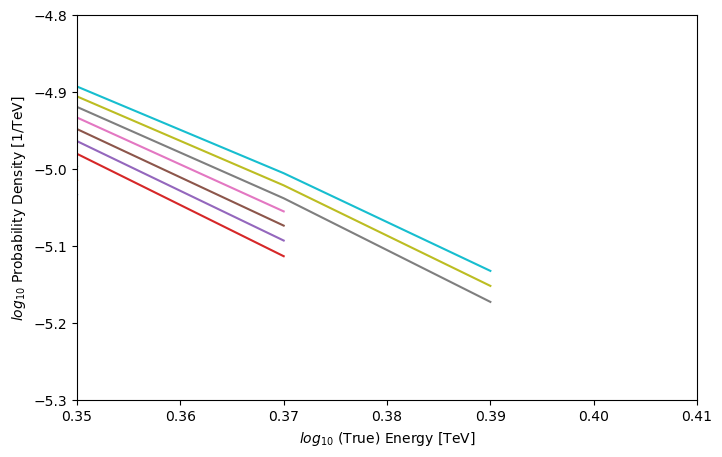

In [33]:
plt.figure(figsize=(8,5))



for logmass in np.linspace(log10eaxis[100]-0.5*(log10eaxis[1]-log10eaxis[0]),log10eaxis[101]+0.5*(log10eaxis[1]-log10eaxis[0]),10):
    plt.plot(log10eaxis, DM_spectrum_setup(logmass,normeaxis=10**log10eaxis)(log10eaxis), label=f'DM spec, logm={logmass}')
    
plt.xlim([log10eaxis[100]-(log10eaxis[1]-log10eaxis[0]),log10eaxis[101]+(log10eaxis[1]-log10eaxis[0])])
plt.ylabel(r'$log_{10}$ Probability Density [1/TeV]')
plt.xlabel(r'$log_{10}$ (True) Energy [TeV]')
plt.ylim([-5.3,-4.8])
# plt.legend()